# Лабораторная работа 2 (Задача кластеризация)

Цель: научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

Дано: excel-файл

Результат: число кластеров, обученная модель

Ход выполнения: 
1. Загрузить данные из файла (использовать библиотеку Pandas).
2. Визуализировать загруженные данные (диаграмма рассеяния).
3. Оценить число групп (кластеров).
4. Выбрать модель кластеризации.
5. Обучить модель кластеризации на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.


Начинаю выполнение работы с загрузки датасета.

In [42]:
import pandas as pd
import numpy as np

data = np.array(pd.read_excel('lab2-06.xlsx'))

data

array([[-1.96064919, -8.88439939],
       [-5.40119337,  3.87496598],
       [-1.68166597, -6.79254065],
       ...,
       [-2.41649995, -9.267296  ],
       [-2.19638617, -5.71081058],
       [-3.18282576, -7.61635791]])

Визуализирую полученные данные

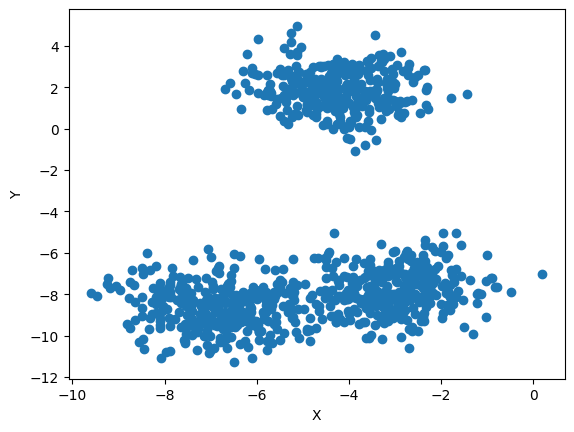

In [43]:
import matplotlib.pylab as plt

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x=data[:, 0], y=data[:, 1])
plt.show()

Визуально я бы разделил данную выборку на три кластера, один явный вверху, и два менее явных внизу, между которыми выбросы в сторону друг друга

Поскольку у нас нет правильных ответов для каждого кластера нашего датасета, то для  кластеризации подходит метод K-средних. Выделим три кластера точек, потому что при выделении большего числа кластеров разделение получается не явное

In [44]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=3)

model.fit(data)


KMeans(n_clusters=3)

Визуализируем полученные кластеры

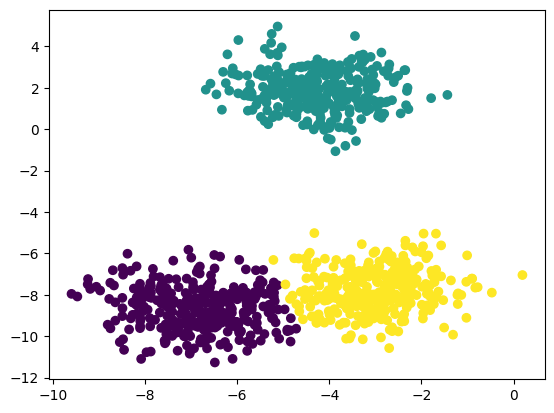

In [45]:
plt.scatter(data[:, 0], data[:, 1], c=model.labels_)

Видим четкие кластеры и четкое деление по ним. Создадим датасет с разделением по кластерам и используем его для обучения и проверки качества модели с алгоритмом k-ближайших соседей

создам новый датасет со столбцом целевых значений

In [46]:
new_data = pd.DataFrame(data)
new_data['ans'] = model.labels_

new_data

,0,1,ans
0,-1.960649,-8.884399,2
1,-5.401193,3.874966,1
2,-1.681666,-6.792541,2
3,-5.184849,2.559263,1
4,-4.601743,2.413843,1
...,...,...,...
995,-3.543993,-8.036834,2
996,-3.554940,-8.143929,2
997,-2.416500,-9.267296,2
998,-2.196386,-5.710811,2


Теперь используем метод k-ближайших соседей и метод 

Разделяю датасет на обучающую и тестовую выборку

In [60]:
from sklearn.model_selection import train_test_split

data_x = new_data.drop('ans', axis=1)
data_y = new_data['ans']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(data_x , data_y, test_size = 0.30, random_state=True)

Проведу обучение модели с случайно выбранным количеством соседей

In [69]:
from sklearn.neighbors import KNeighborsClassifier

k_neig_model = KNeighborsClassifier(n_neighbors = 2)
k_neig_model.fit(x_training_data, y_training_data)

x_training_data, y_training_data

(            0         1
 731 -4.476569  1.770143
 716 -2.333647 -7.322745
 640 -3.608931 -7.630158
 804 -6.918648 -9.499628
 737 -4.448082 -6.047628
 ..        ...       ...
 767 -6.852259 -9.345271
 72  -5.841728 -9.207938
 908 -8.023934 -8.570134
 235 -2.631226 -6.911899
 37  -4.200658  1.391096
 
 [700 rows x 2 columns],
 731    1
 716    2
 640    2
 804    0
 737    2
       ..
 767    0
 72     0
 908    0
 235    2
 37     1
 Name: ans, Length: 700, dtype: int32)

Сделаю предсказания с помощью обученной модели и оценю их точность

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = model.predict(np.array(x_test_data))

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[103   0   0]
 [  0  94   0]
 [  0   0 103]]
